In [1]:
import config

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
import miscellaneous_utils as mu
import figure_utils
from statsmodels.tsa.stattools import adfuller

cohort = "Poyet"
from matplotlib import rc,rcParams


In [2]:
pass_ = 0
all_ = 0
for host in ["am","ao","an","ae"]:
    df = pd.read_csv("%s/chisq/%s/%s_strain_chisq_test_cross.txt" % (config.analysis_directory,cohort,host),header=None,index_col=0)
    pass_ +=(df[1] > .05).sum()
    all_ += df[1].shape[0]

In [6]:
pass_/all_

0.8666666666666667

In [4]:
all_

62

In [5]:
pass_ = 0
all_ = 0
for host in ["am","ao","an","ae"]:
    df = pd.read_csv("%s/chisq/%s/%s_species_chisq_test.txt" % (config.analysis_directory,cohort,host),header=None,index_col=0)
    pass_ += (df[1] > .05).sum()
    all_ += df[1].shape[0]

In [6]:
host = "ao"
df = pd.read_csv("%s/chisq/%s/%s_strain_chisq_test_cross.txt" % (config.analysis_directory,cohort,host),header=None,index_col=0)
df_species = pd.read_csv("%s/chisq/%s/%s_species_chisq_test.txt" % (config.analysis_directory,cohort,host),header=None,index_col=0)

In [7]:
(df[1] > .05).mean()

0.8666666666666667

In [8]:
pass_

39

In [9]:
all_

45

In [10]:
(df_species[1] > .05).mean()

1.0

In [11]:
df_species

,1
0,
Bacteroides_fragilis_54507,0.197635
Bacteroides_ovatus_58035,0.782433
Bacteroides_uniformis_57318,0.602811
Bacteroides_xylanisolvens_57185,0.107696
Bifidobacterium_adolescentis_56815,0.961498
Dialister_invisus_61905,0.197043
Eubacterium_eligens_61678,0.615961
Eubacterium_rectale_56927,0.127737
Faecalibacterium_prausnitzii_61481,0.665510


In [12]:
df_species = df_species.squeeze()
df_species.index = [[figure_utils.get_pretty_species_name(d) for d in df_species.index]]

In [13]:
#s = [d[0] for d in df_species.index]

#df_species.index = s

In [14]:
df[1]

0
Bacteroides_fragilis_54507_A            0.197635
Bacteroides_ovatus_58035_A              0.904378
Bacteroides_ovatus_58035_B              0.444459
Bacteroides_uniformis_57318_A           0.602811
Bacteroides_xylanisolvens_57185_A       0.171933
Bacteroides_xylanisolvens_57185_B       0.168152
Bifidobacterium_adolescentis_56815_A    0.961498
Dialister_invisus_61905_A               0.197043
Eubacterium_eligens_61678_A             0.319324
Eubacterium_rectale_56927_A             0.131848
Faecalibacterium_prausnitzii_61481_A    0.011551
Faecalibacterium_prausnitzii_61481_B    0.000003
Faecalibacterium_prausnitzii_62201_A    0.403301
Parabacteroides_distasonis_56985_A      0.539749
Ruminococcus_bicirculans_59300_A        0.580338
Name: 1, dtype: float64

In [15]:
species_names = [figure_utils.get_pretty_species_name(d[:-2]) for d in df.index]
df["species"] = species_names

In [16]:
(df[1] > .05).mean()

0.8666666666666667

In [17]:
pass_/all_

0.8666666666666667

In [18]:
df_gb = df.groupby("species")

In [19]:
df_strain_species = {}
for species in df_gb.groups:
    df_strain_species[species] = df_gb.get_group(species)[1].values
    a=df_strain_species[species]
    df_strain_species[species] = np.pad(a, (0,3 - len(df_strain_species[species])), mode='constant',constant_values=(np.nan,))

In [21]:
cmap = plt.get_cmap('RdBu', 10)
cmap.set_under("red")
cmap.set_over("blue")

In [22]:
df_strain_species = pd.DataFrame(df_strain_species).T

In [23]:
df_strain_species

,0,1,2
Bacteroides fragilis,0.197635,NaN,NaN
Bacteroides ovatus,0.904378,0.444459,NaN
Bacteroides uniformis,0.602811,NaN,NaN
Bacteroides xylanisolvens,0.171933,0.168152,NaN
Bifidobacterium adolescentis,0.961498,NaN,NaN
Dialister invisus,0.197043,NaN,NaN
Eubacterium rectale,0.131848,NaN,NaN
Faecalibacterium prausnitzii (61481),0.011551,0.000003,NaN
Faecalibacterium prausnitzii (62201),0.403301,NaN,NaN
Lachnospira eligens,0.319324,NaN,NaN


In [24]:
df_strain_species.columns = ["Strain A","Strain B", "Strain C"]

In [25]:
df_strain_species["Species"] = np.nan

In [26]:
for ind in df_strain_species.index:
    print(ind)
    df_strain_species.loc[ind,"Species"] = df_species.loc[ind][0]

Bacteroides fragilis
Bacteroides ovatus
Bacteroides uniformis
Bacteroides xylanisolvens
Bifidobacterium adolescentis
Dialister invisus
Eubacterium rectale
Faecalibacterium prausnitzii (61481)
Faecalibacterium prausnitzii (62201)
Lachnospira eligens
Parabacteroides distasonis
Ruminococcus bicirculans


In [7]:
def make_heatmap(host,ax=None,fig=None):
    
    df = pd.read_csv("%s/chisq/%s/%s_strain_chisq_test_cross.txt" % (config.analysis_directory,cohort,host),header=None,index_col=0)
    df_species = pd.read_csv("%s/chisq/%s/%s_species_chisq_test.txt" % (config.analysis_directory,cohort,host),header=None,index_col=0)

    df_species = df_species.squeeze()
    df_species.index = [[figure_utils.get_pretty_species_name(d) for d in df_species.index]]

    species_names = [figure_utils.get_pretty_species_name(d[:-2]) for d in df.index]
    df["species"] = species_names

    df_gb = df.groupby("species")

    df_strain_species = {}
    for species in df_gb.groups:
        df_strain_species[species] = df_gb.get_group(species)[1].values
        a=df_strain_species[species]
        df_strain_species[species] = np.pad(a, (0,3 - len(df_strain_species[species])), mode='constant',constant_values=(np.nan,))

    cmap = plt.get_cmap('RdBu', 10)
    cmap.set_under("red")
    cmap.set_over("blue")

    df_strain_species = pd.DataFrame(df_strain_species).T

    df_strain_species.columns = ["Strain A","Strain B", "Strain C"]

    df_strain_species["Species"] = np.nan

    for ind in df_strain_species.index:
        df_strain_species.loc[ind,"Species"] = df_species.loc[ind][0]
    
    if ax == None:
        fig,ax = plt.subplots(figsize=(12,8))        
    
    
    sns.heatmap(df_strain_species, ax=ax,cmap=cmap,vmin=0.05,vmax=.050001,
                linewidths=3,linecolor="white",cbar=None,annot=True,annot_kws={"fontsize":20,"color":"white"});

    ax.set_title(host,size=30, fontstyle='italic',pad=25)

    ax.tick_params(axis='x', which='major', labelsize=20,rotation=0,pad=20)
    ax.tick_params(axis='y', which='major', labelsize=20)

    ax.set_yticklabels(ax.get_yticklabels(), fontstyle='italic');
    ax.set_xticklabels(ax.get_xticklabels(), fontweight="bold");
    
    

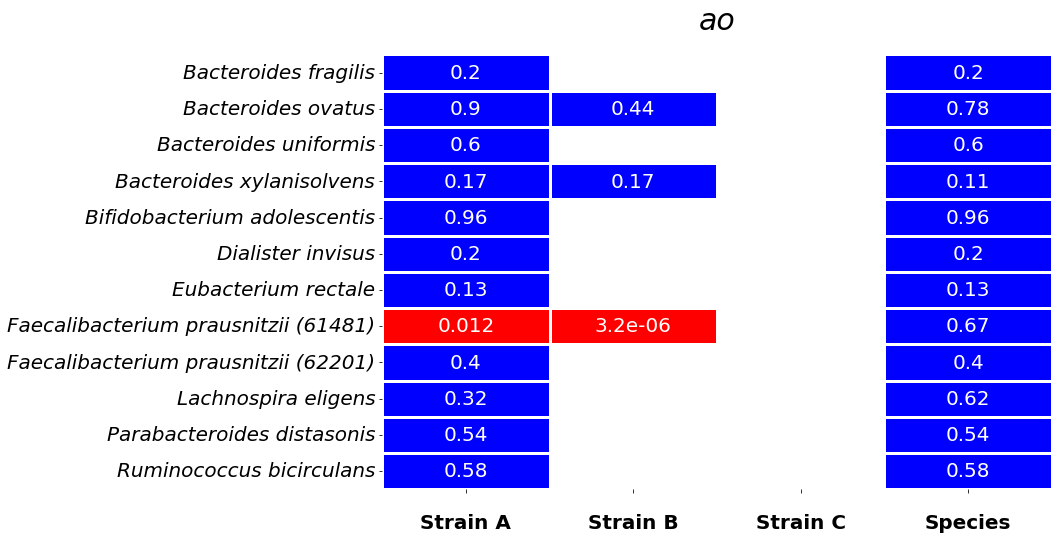

In [26]:
make_heatmap("ao")

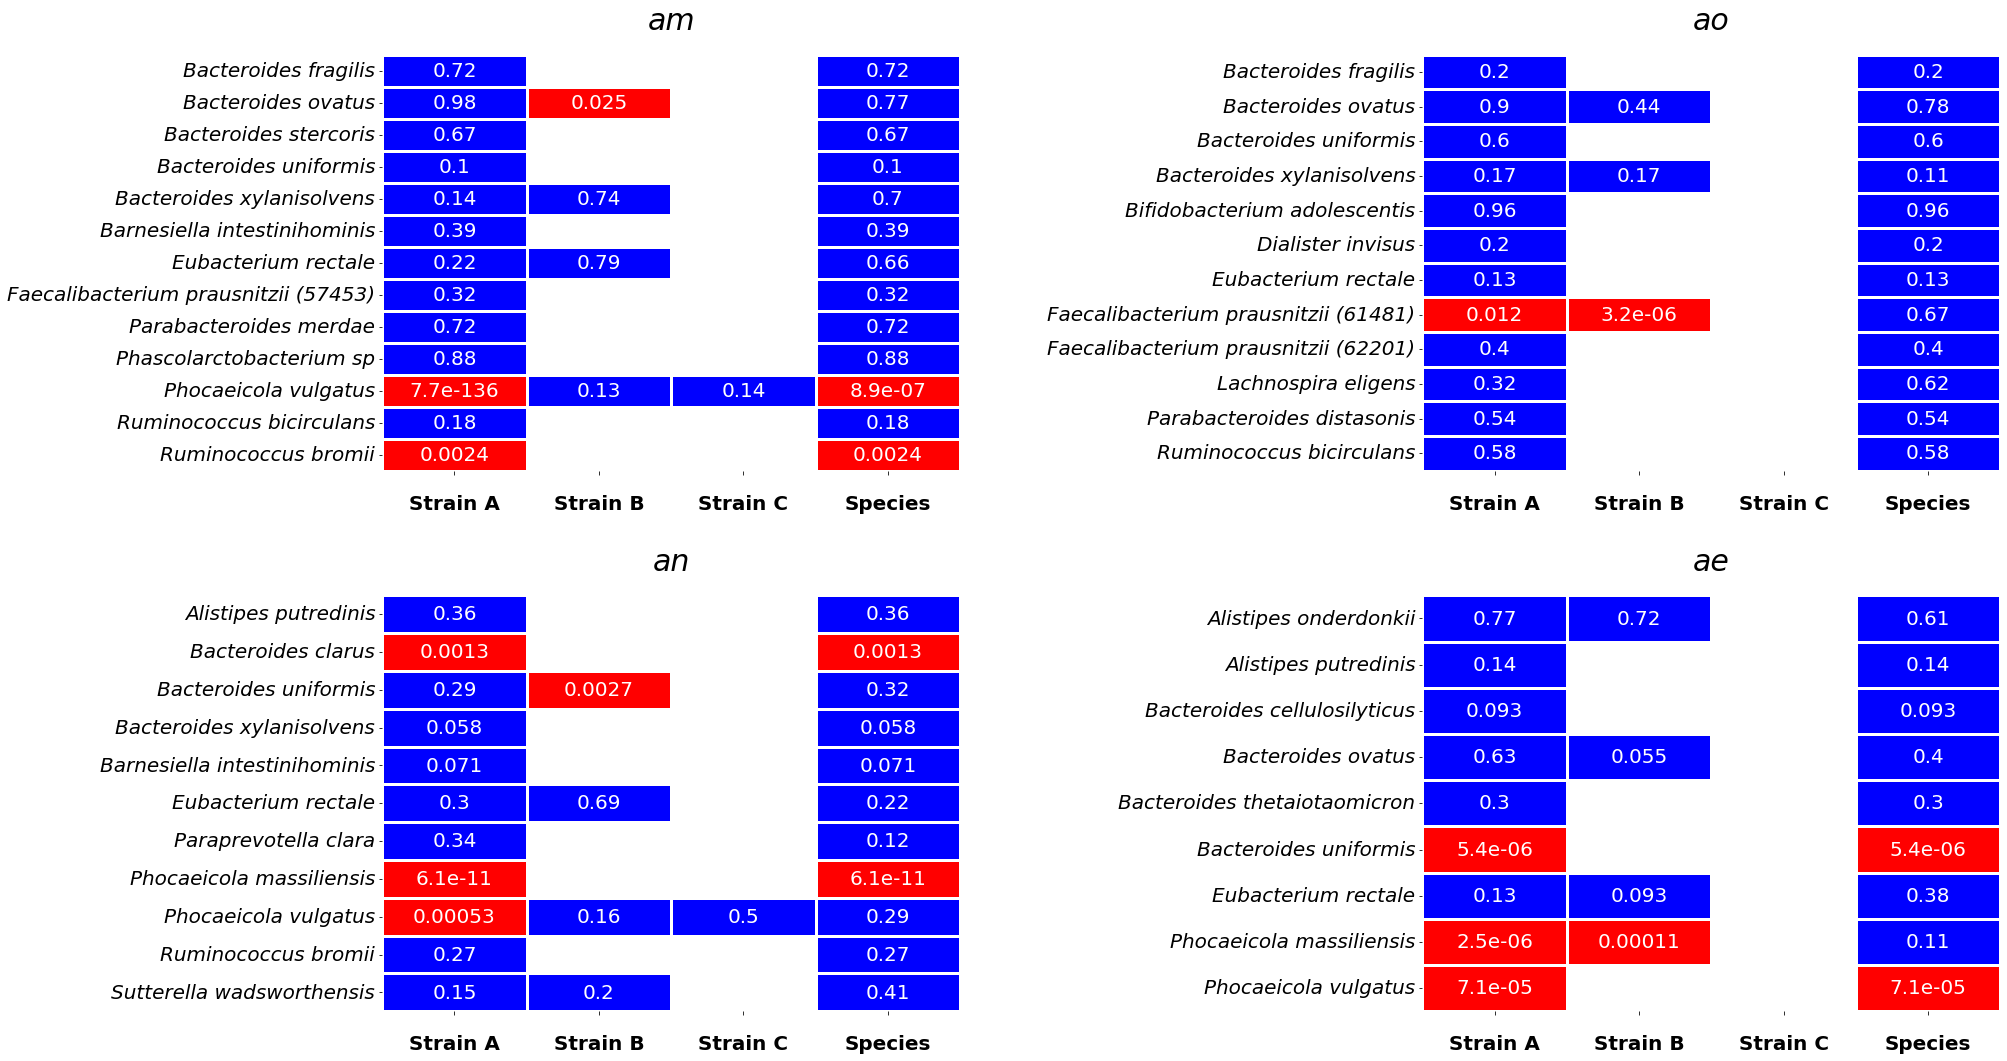

In [8]:
fig,axs = plt.subplots(2,2,figsize=(29,17.6))

axs = axs.ravel()
make_heatmap("am",ax=axs[0],fig=fig)
make_heatmap("ao",ax=axs[1],fig=fig)
make_heatmap("an",ax=axs[2],fig=fig)
make_heatmap("ae",ax=axs[3],fig=fig)

fig.subplots_adjust(hspace=.3,wspace=.8)
fig.savefig("Figure_2.pdf",bbox_inches='tight')
#fig.tight_layout()

In [33]:
F_st_all = {}
for h in ["ao","am","an","ae"]:
    df = pd.read_csv(f"fst_{h}.csv",index_col=0)
    F_st_all[h] = df

In [34]:
H_all = {}
for host in ["ao","am","an","ae"]: 
    H = {}
    Fst_prime = F_st_all[host]
    for s in Fst_prime.index:
        st = s
        y = Fst_prime.loc[s].dropna()
        H[st] = adfuller(y.values[1:])[1]    
        H_all[host] = pd.Series(H)

In [35]:
H_all

{'ao': Bifidobacterium adolescentis            1.039177e-01
 Dialister invisus                       3.960219e-05
 Ruminococcus bicirculans                3.562595e-08
 Eubacterium rectale                     1.141982e-10
 Parabacteroides distasonis              1.600542e-02
 Faecalibacterium prausnitzii (62201)    5.393214e-09
 Faecalibacterium prausnitzii (61481)    1.559438e-01
 Bacteroides uniformis                   2.892889e-12
 Bacteroides xylanisolvens               1.646164e-02
 Bacteroides fragilis                    3.576553e-01
 Lachnospira eligens                     9.176237e-12
 Bacteroides ovatus                      1.424175e-02
 dtype: float64,
 'am': Phascolarctobacterium sp                1.296181e-02
 Barnesiella intestinihominis            9.966407e-06
 Faecalibacterium prausnitzii (57453)    1.403765e-09
 Ruminococcus bromii                     2.489234e-12
 Bacteroides uniformis                   1.646821e-01
 Ruminococcus bicirculans                5.981301e-10

In [44]:
host = "ao"
df_species_all = {}
for host in ["am","ao","an","ae"]:
    df_species = pd.read_csv("%s/chisq/%s/%s_species_chisq_test.txt" % (config.analysis_directory,cohort,host),
                             header=None,index_col=0)
    df_species.index = [figure_utils.get_pretty_species_name(f) for f in df_species.index]
    df_species.columns = ["slm"]
    df_species["adf"] = H_all[host]
    df_species_all[host] = df_species
    df_species.to_csv(f"{host}_pvalues.csv")

In [37]:
df_species_all["am"]

,slm,adf
Bacteroides fragilis,7.155380e-01,1.318061e-02
Bacteroides ovatus,7.726094e-01,1.340622e-02
Bacteroides stercoris,6.745320e-01,3.188989e-16
Bacteroides uniformis,1.046701e-01,1.646821e-01
Phocaeicola vulgatus,8.915782e-07,4.550612e-04
Bacteroides xylanisolvens,6.965510e-01,3.093074e-04
Barnesiella intestinihominis,3.916252e-01,9.966407e-06
Eubacterium rectale,6.626272e-01,7.094752e-14
Faecalibacterium prausnitzii (57453),3.231361e-01,1.403765e-09
Parabacteroides merdae,7.159160e-01,4.422773e-16


In [38]:
(df_species_all["am"]["slm"] < .05)*(df_species_all["am"]["adf"] > .05)

Bacteroides fragilis                    False
Bacteroides ovatus                      False
Bacteroides stercoris                   False
Bacteroides uniformis                   False
Phocaeicola vulgatus                    False
Bacteroides xylanisolvens               False
Barnesiella intestinihominis            False
Eubacterium rectale                     False
Faecalibacterium prausnitzii (57453)    False
Parabacteroides merdae                  False
Phascolarctobacterium sp                False
Ruminococcus bicirculans                False
Ruminococcus bromii                     False
dtype: bool

In [39]:
(df_species_all["ao"]["slm"] < .05)*(df_species_all["ao"]["adf"] > .05)

Bacteroides fragilis                    False
Bacteroides ovatus                      False
Bacteroides uniformis                   False
Bacteroides xylanisolvens               False
Bifidobacterium adolescentis            False
Dialister invisus                       False
Lachnospira eligens                     False
Eubacterium rectale                     False
Faecalibacterium prausnitzii (61481)    False
Faecalibacterium prausnitzii (62201)    False
Parabacteroides distasonis              False
Ruminococcus bicirculans                False
dtype: bool

In [40]:
(df_species_all["ae"]["slm"] < .05)*(df_species_all["ae"]["adf"] > .05)

Alistipes onderdonkii           False
Alistipes putredinis            False
Bacteroides cellulosilyticus    False
Phocaeicola massiliensis        False
Bacteroides ovatus              False
Bacteroides thetaiotaomicron    False
Bacteroides uniformis           False
Phocaeicola vulgatus            False
Eubacterium rectale             False
dtype: bool

In [41]:
(df_species_all["an"]["slm"] < .05)*(df_species_all["an"]["adf"] > .05)

Alistipes putredinis            False
Bacteroides clarus              False
Phocaeicola massiliensis        False
Bacteroides uniformis           False
Phocaeicola vulgatus            False
Bacteroides xylanisolvens       False
Barnesiella intestinihominis    False
Eubacterium rectale             False
Paraprevotella clara            False
Ruminococcus bromii             False
Sutterella wadsworthensis       False
dtype: bool

In [42]:
df_species_all["an"]["adf"] > .05

Alistipes putredinis            False
Bacteroides clarus              False
Phocaeicola massiliensis        False
Bacteroides uniformis           False
Phocaeicola vulgatus            False
Bacteroides xylanisolvens       False
Barnesiella intestinihominis     True
Eubacterium rectale              True
Paraprevotella clara            False
Ruminococcus bromii             False
Sutterella wadsworthensis       False
Name: adf, dtype: bool

In [43]:
df_species_all["ae"]["slm"]

Alistipes onderdonkii           0.613135
Alistipes putredinis            0.139633
Bacteroides cellulosilyticus    0.093381
Phocaeicola massiliensis        0.107012
Bacteroides ovatus              0.402403
Bacteroides thetaiotaomicron    0.296693
Bacteroides uniformis           0.000005
Phocaeicola vulgatus            0.000071
Eubacterium rectale             0.376766
Name: slm, dtype: float64